In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Non-linear data example

## Human Fall Detection

- Taken from https://archive.ics.uci.edu/dataset/196/localization+data+for+person+activity
- Measures X,Y,Z position of Chest, Belt, Ankles

## Actions
- Walking, Sitting, Lying, getting up, sitting down, ..., Falling
- Set the Target to 1 if Falling, 0 otherwise

### Walking example

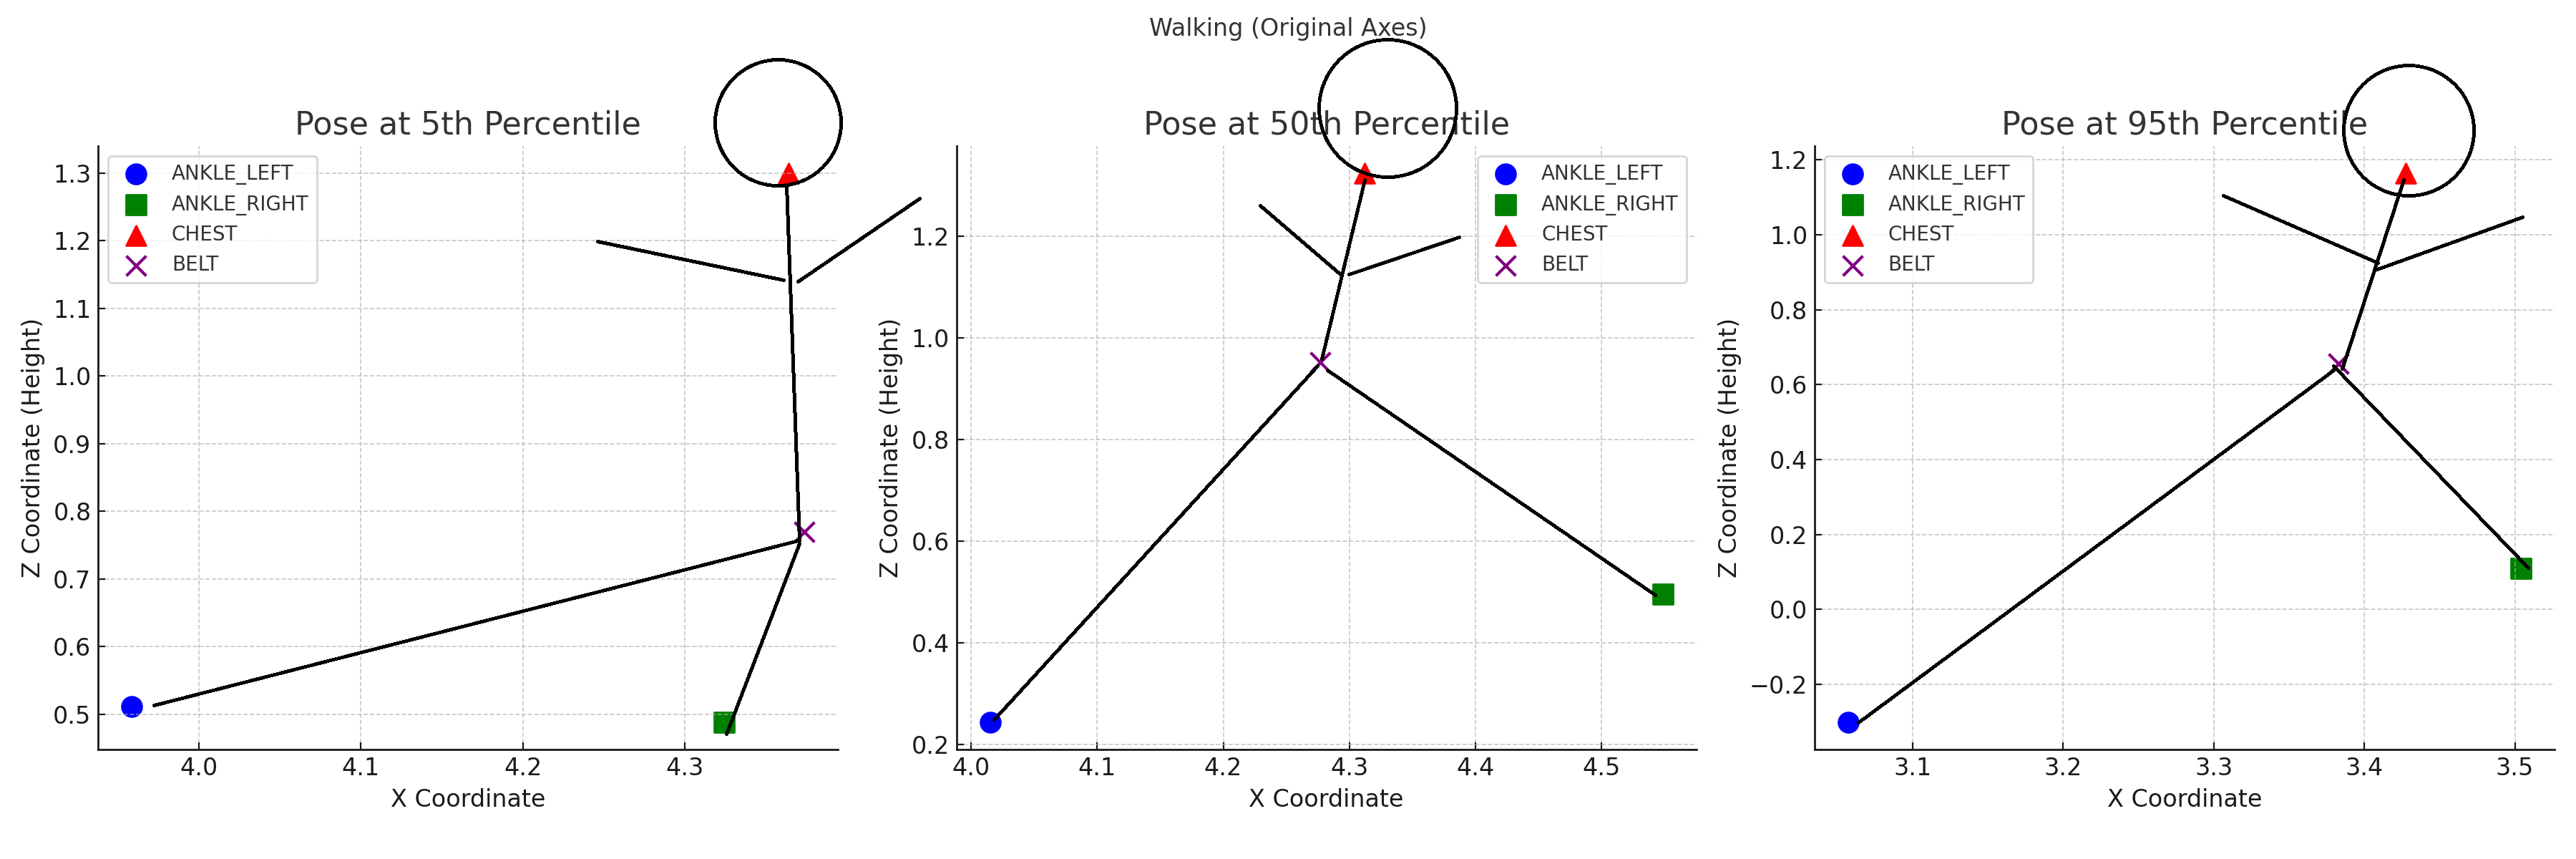

### Fall Down Example

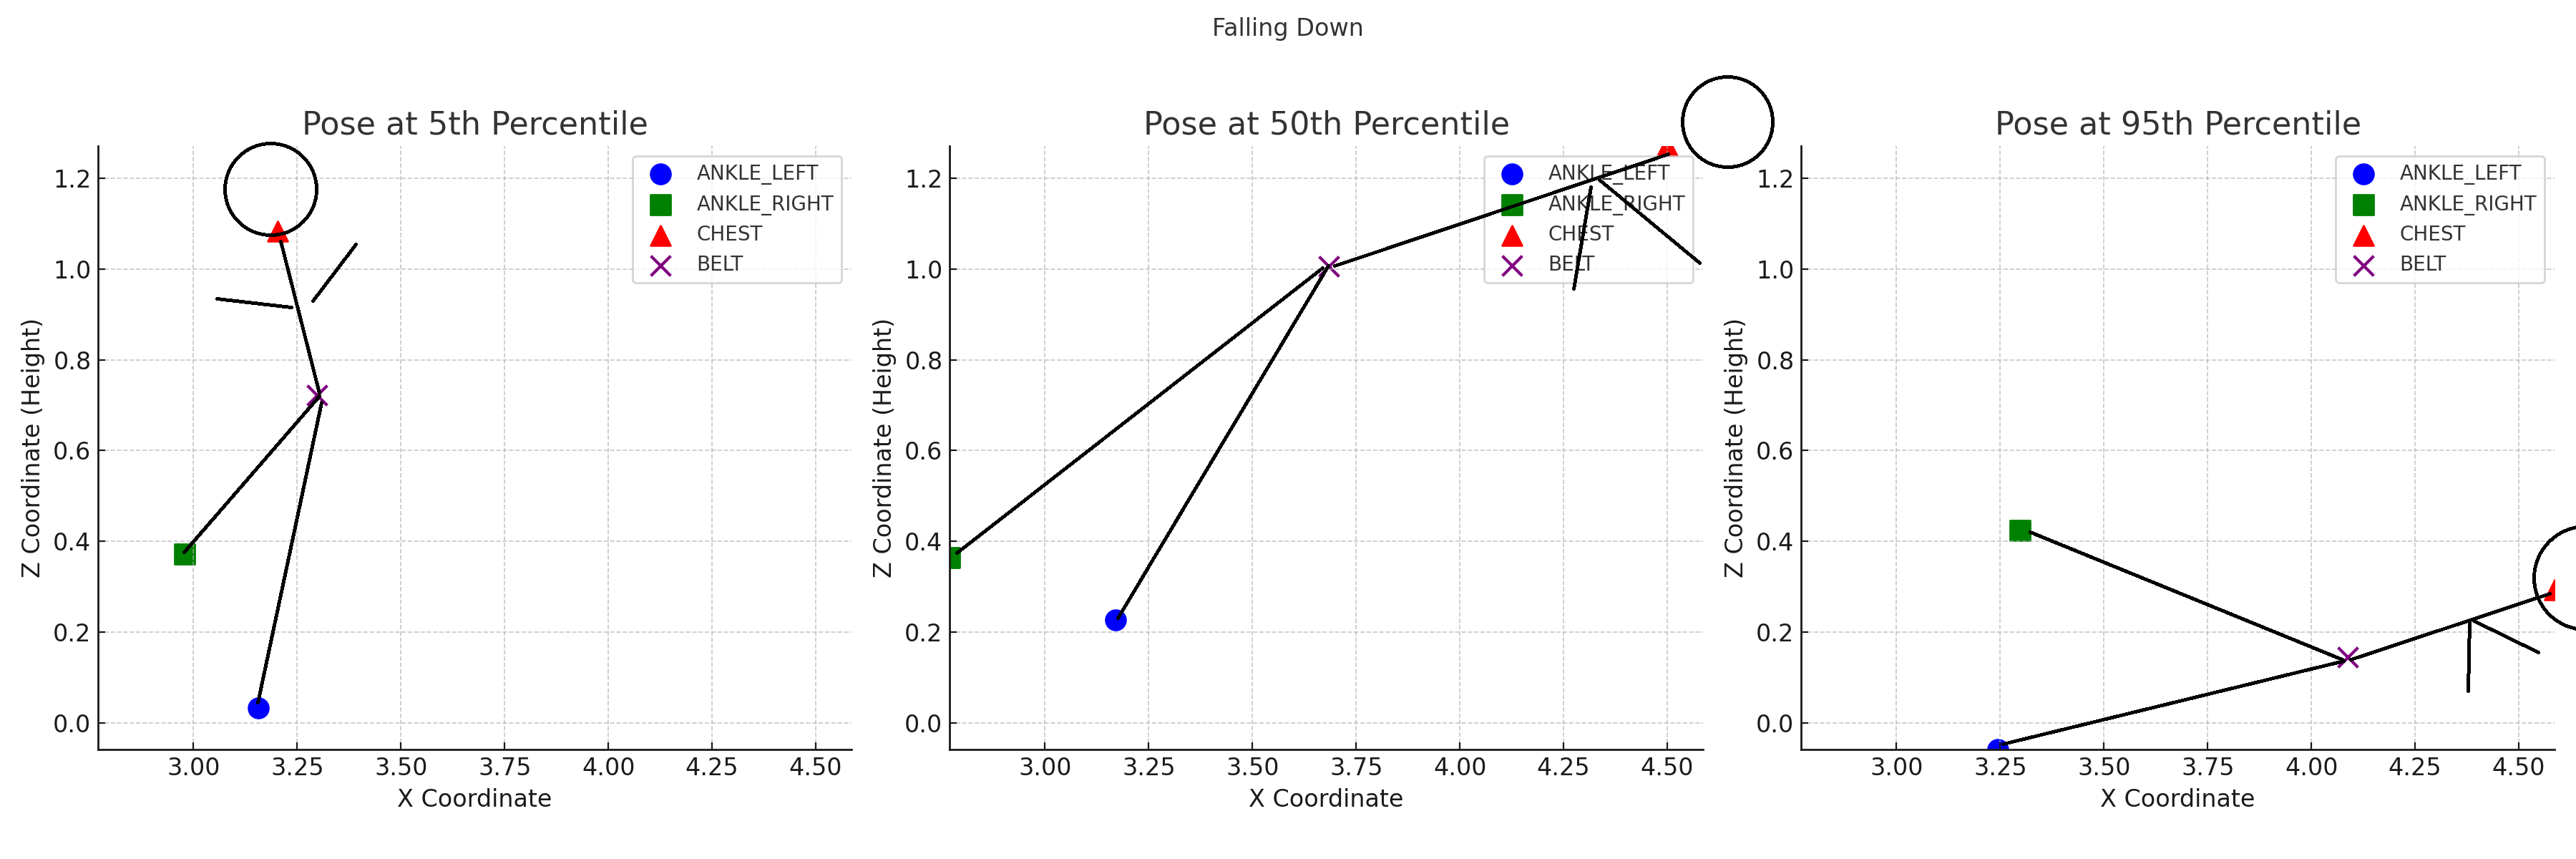

# Neural Net (3 layers, 2 nodes)

In [ ]:
import pandas as pd

# Load the training and test datasets
train_data_path = 'resampled_data_allactions_train.csv'
test_data_path = 'resampled_data_allactions_test.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# Display the first few rows of each dataset to understand their structure
test_data.head()


,ANKLE_LEFT_X_5,ANKLE_LEFT_Y_5,ANKLE_LEFT_Z_5,ANKLE_LEFT_X_50,ANKLE_LEFT_Y_50,ANKLE_LEFT_Z_50,ANKLE_LEFT_X_95,ANKLE_LEFT_Y_95,ANKLE_LEFT_Z_95,ANKLE_RIGHT_X_5,...,BELT_X_5,BELT_Y_5,BELT_Z_5,BELT_X_50,BELT_Y_50,BELT_Z_50,BELT_X_95,BELT_Y_95,BELT_Z_95,target
0,2.721047,2.720303,0.265572,2.602022,2.524881,0.308385,2.670349,2.579121,0.375369,2.725135,...,1.568645,2.052912,0.172953,1.553060,2.111470,0.167933,3.347422,2.302616,1.077919,0
1,2.326994,1.361973,0.117444,2.593446,1.981351,0.149493,2.560787,2.051929,0.066421,2.578415,...,2.210591,1.478689,0.472997,1.340816,1.709670,0.692712,2.062649,1.254101,0.212285,0
2,2.360982,1.735658,0.234418,2.892621,1.775236,0.176696,3.204212,2.029883,0.036036,1.958950,...,2.020108,1.404280,0.902339,2.750435,1.980476,0.790100,3.456787,2.073158,0.824246,0
3,3.198212,1.600053,-0.248696,2.876512,1.577986,-0.002124,3.285145,1.790857,-0.187033,3.235599,...,3.331197,1.293924,0.428304,3.236245,1.675598,0.070891,3.192410,1.825705,0.774940,0
4,2.429494,1.781880,0.064344,2.943915,1.718454,-0.199394,2.859680,1.518345,0.217543,2.501493,...,2.131149,1.810048,0.529099,2.126099,1.905595,0.607882,2.159264,1.894015,0.606112,0


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Separate features and target variable for training and test sets
X_train = train_data.drop(columns=['target'])
y_train = train_data['target']

X_test = test_data.drop(columns=['target'])
y_test = test_data['target']

# Initialize lists to store training and test accuracies
train_accuracies = []
test_accuracies = []

# Initialize the neural network classifier
# Using a single hidden layer with 3 neurons
# The output layer will have 2 neurons, suitable for binary classification
mlp = MLPClassifier(hidden_layer_sizes=(3,), max_iter=1, warm_start=True, solver='sgd')

epoch_num = 500
# Train for 50 epochs
for epoch in range(epoch_num):
    # Fit model on training data
    mlp.fit(X_train, y_train)

    # Calculate and store training accuracy
    train_pred = mlp.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)

    # Calculate and store test accuracy
    test_pred = mlp.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

# Plotting the training and test accuracies for each epoch
epochs = np.arange(1, epoch_num+1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy by Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Display final training and test accuracies
final_train_accuracy = train_accuracies[-1]
final_test_accuracy = test_accuracies[-1]
final_train_accuracy, final_test_accuracy


NameError: ignored

# Test with increasing number of layers
- 3 neurons
- 3 to 10 layers

In [ ]:
# Initialize dictionaries to store 50th-epoch results for varying number of layers
final_train_accuracies_layers = {}
final_test_accuracies_layers = {}
final_train_losses_layers = {}

# Loop over models with hidden layers from 3 to 10
for num_layers in range(3, 11):
    # Initialize lists to store epoch-wise results for the current model
    train_accuracies_current = []
    test_accuracies_current = []
    train_losses_current = []

    # Initialize the neural network classifier for the current model
    mlp_current = MLPClassifier(hidden_layer_sizes=(3,) * num_layers, max_iter=1, warm_start=False, solver='sgd')

    # Train for 50 epochs
    for epoch in range(50):
        # Fit model on training data
        mlp_current.fit(X_train, y_train)

        # Calculate and store epoch-wise training accuracy
        train_pred_current = mlp_current.predict(X_train)
        train_accuracy_current = accuracy_score(y_train, train_pred_current)
        train_accuracies_current.append(train_accuracy_current)

        # Calculate and store epoch-wise test accuracy
        test_pred_current = mlp_current.predict(X_test)
        test_accuracy_current = accuracy_score(y_test, test_pred_current)
        test_accuracies_current.append(test_accuracy_current)

        # Calculate and store epoch-wise training loss
        train_pred_prob_current = mlp_current.predict_proba(X_train)
        train_loss_current = cross_entropy_loss(y_train, train_pred_prob_current)
        train_losses_current.append(train_loss_current)

    # Store 50th-epoch results for the current model
    final_train_accuracies_layers[num_layers] = train_accuracies_current[-1]
    final_test_accuracies_layers[num_layers] = test_accuracies_current[-1]
    final_train_losses_layers[num_layers] = train_losses_current[-1]

# Display the 50th-epoch results in tabular form
results_df = pd.DataFrame({
    'Number_of_Layers': list(final_train_accuracies_layers.keys()),
    'Training_Accuracy_50th_Epoch': list(final_train_accuracies_layers.values()),
    'Test_Accuracy_50th_Epoch': list(final_test_accuracies_layers.values()),
    'Training_Loss_50th_Epoch': list(final_train_losses_layers.values())
})

results_df


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686

,Number_of_Layers,Training_Accuracy_50th_Epoch,Test_Accuracy_50th_Epoch,Training_Loss_50th_Epoch
0,3,0.720907,0.508333,0.637277
1,4,0.500000,0.091667,0.761495
2,5,0.500000,0.908333,0.721014
3,6,0.500000,0.908333,0.694284
4,7,0.500000,0.908333,0.856278
5,8,0.500000,0.908333,0.736147
6,9,0.500000,0.908333,0.832451
7,10,0.500000,0.908333,0.875299


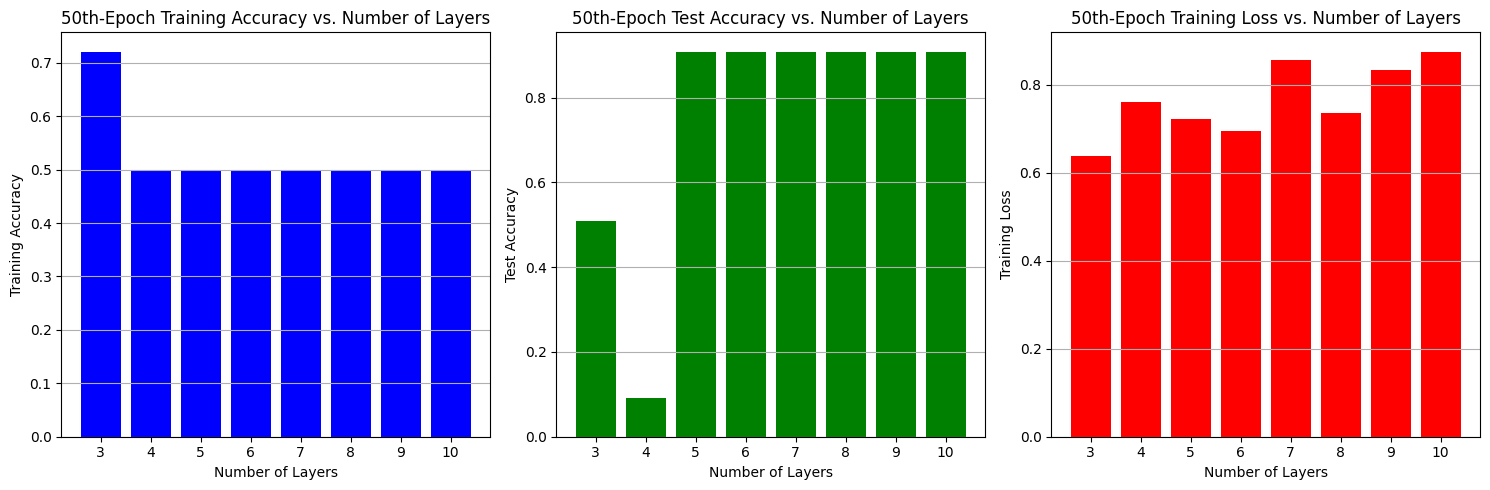

In [ ]:
# Plotting the 50th-epoch results for varying number of layers
plt.figure(figsize=(15, 5))

# Plot for 50th-epoch Training Accuracy
plt.subplot(1, 3, 1)
plt.bar(results_df['Number_of_Layers'], results_df['Training_Accuracy_50th_Epoch'], color='blue')
plt.xlabel('Number of Layers')
plt.ylabel('Training Accuracy')
plt.title('50th-Epoch Training Accuracy vs. Number of Layers')
plt.grid(True, axis='y')

# Plot for 50th-epoch Test Accuracy
plt.subplot(1, 3, 2)
plt.bar(results_df['Number_of_Layers'], results_df['Test_Accuracy_50th_Epoch'], color='green')
plt.xlabel('Number of Layers')
plt.ylabel('Test Accuracy')
plt.title('50th-Epoch Test Accuracy vs. Number of Layers')
plt.grid(True, axis='y')

# Plot for 50th-epoch Training Loss
plt.subplot(1, 3, 3)
plt.bar(results_df['Number_of_Layers'], results_df['Training_Loss_50th_Epoch'], color='red')
plt.xlabel('Number of Layers')
plt.ylabel('Training Loss')
plt.title('50th-Epoch Training Loss vs. Number of Layers')
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()


# Test increasing number of neurons
- Fix the layers at 5
- loop through 3 to 10 neurons

In [ ]:
# Initialize dictionaries to store 50th-epoch results for varying number of neurons
final_train_accuracies_neurons = {}
final_test_accuracies_neurons = {}
final_train_losses_neurons = {}

# Loop over models with neurons from 3 to 10 in each of the 5 hidden layers
for num_neurons in range(3, 11):
    # Initialize lists to store epoch-wise results for the current model
    train_accuracies_current_neurons = []
    test_accuracies_current_neurons = []
    train_losses_current_neurons = []

    # Initialize the neural network classifier for the current model
    mlp_current_neurons = MLPClassifier(hidden_layer_sizes=(num_neurons,) * 5, max_iter=1, warm_start=True, solver='sgd')

    # Train for 50 epochs
    for epoch in range(50):
        # Fit model on training data
        mlp_current_neurons.fit(X_train, y_train)

        # Calculate and store epoch-wise training accuracy
        train_pred_current_neurons = mlp_current_neurons.predict(X_train)
        train_accuracy_current_neurons = accuracy_score(y_train, train_pred_current_neurons)
        train_accuracies_current_neurons.append(train_accuracy_current_neurons)

        # Calculate and store epoch-wise test accuracy
        test_pred_current_neurons = mlp_current_neurons.predict(X_test)
        test_accuracy_current_neurons = accuracy_score(y_test, test_pred_current_neurons)
        test_accuracies_current_neurons.append(test_accuracy_current_neurons)

        # Calculate and store epoch-wise training loss
        train_pred_prob_current_neurons = mlp_current_neurons.predict_proba(X_train)
        train_loss_current_neurons = cross_entropy_loss(y_train, train_pred_prob_current_neurons)
        train_losses_current_neurons.append(train_loss_current_neurons)

    # Store 50th-epoch results for the current model
    final_train_accuracies_neurons[num_neurons] = train_accuracies_current_neurons[-1]
    final_test_accuracies_neurons[num_neurons] = test_accuracies_current_neurons[-1]
    final_train_losses_neurons[num_neurons] = train_losses_current_neurons[-1]

# Display the 50th-epoch results in tabular form
results_neurons_df = pd.DataFrame({
    'Number_of_Neurons': list(final_train_accuracies_neurons.keys()),
    'Training_Accuracy_50th_Epoch': list(final_train_accuracies_neurons.values()),
    'Test_Accuracy_50th_Epoch': list(final_test_accuracies_neurons.values()),
    'Training_Loss_50th_Epoch': list(final_train_losses_neurons.values())
})

results_neurons_df


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686

,Number_of_Neurons,Training_Accuracy_50th_Epoch,Test_Accuracy_50th_Epoch,Training_Loss_50th_Epoch
0,3,0.500000,0.908333,0.817487
1,4,0.500000,0.908333,0.681877
2,5,0.500000,0.091667,0.693382
3,6,0.500000,0.908333,0.749867
4,7,0.701183,0.850000,0.611041
5,8,0.500000,0.908333,0.669354
6,9,0.816568,0.733333,0.645240
7,10,0.746548,0.545833,0.599456


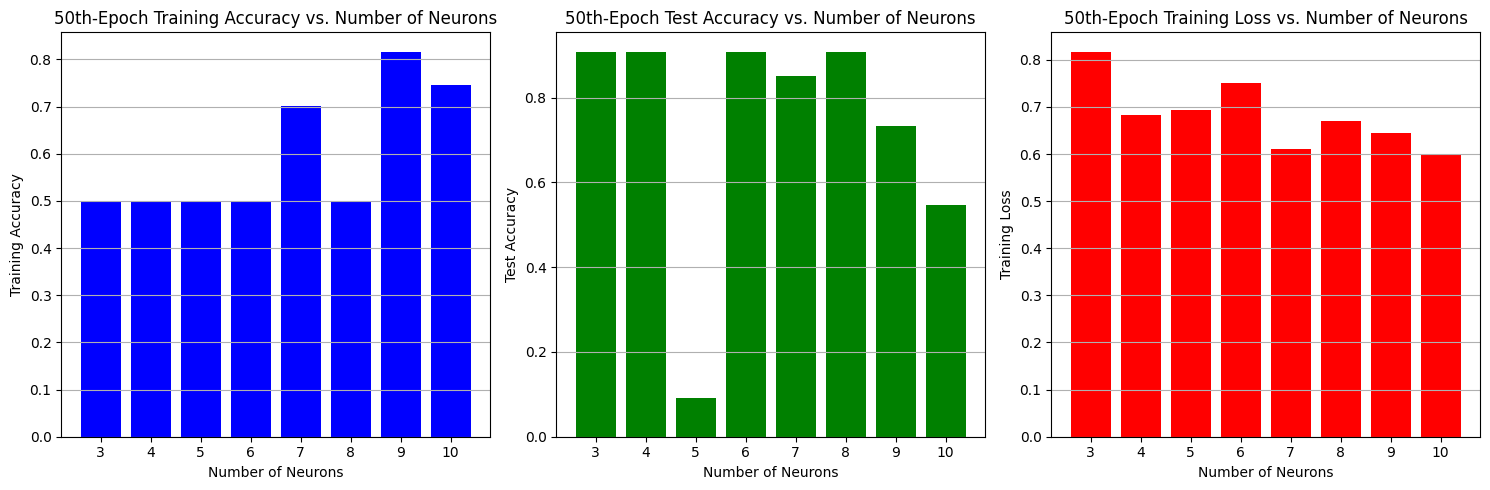

In [ ]:
# Plotting the 50th-epoch results for varying number of neurons in 5-layer model
plt.figure(figsize=(15, 5))

# Plot for 50th-epoch Training Accuracy
plt.subplot(1, 3, 1)
plt.bar(results_neurons_df['Number_of_Neurons'], results_neurons_df['Training_Accuracy_50th_Epoch'], color='blue')
plt.xlabel('Number of Neurons')
plt.ylabel('Training Accuracy')
plt.title('50th-Epoch Training Accuracy vs. Number of Neurons')
plt.grid(True, axis='y')

# Plot for 50th-epoch Test Accuracy
plt.subplot(1, 3, 2)
plt.bar(results_neurons_df['Number_of_Neurons'], results_neurons_df['Test_Accuracy_50th_Epoch'], color='green')
plt.xlabel('Number of Neurons')
plt.ylabel('Test Accuracy')
plt.title('50th-Epoch Test Accuracy vs. Number of Neurons')
plt.grid(True, axis='y')

# Plot for 50th-epoch Training Loss
plt.subplot(1, 3, 3)
plt.bar(results_neurons_df['Number_of_Neurons'], results_neurons_df['Training_Loss_50th_Epoch'], color='red')
plt.xlabel('Number of Neurons')
plt.ylabel('Training Loss')
plt.title('50th-Epoch Training Loss vs. Number of Neurons')
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()


# Change activation function to sigmoid

In [ ]:
# Initialize dictionaries to store 50th-epoch results for varying number of neurons with sigmoid activation
final_train_accuracies_sigmoid = {}
final_test_accuracies_sigmoid = {}
final_train_losses_sigmoid = {}

# Loop over models with neurons from 3 to 10 in each of the 5 hidden layers
for num_neurons in range(3, 11):
    # Initialize lists to store epoch-wise results for the current model
    train_accuracies_current_sigmoid = []
    test_accuracies_current_sigmoid = []
    train_losses_current_sigmoid = []

    # Initialize the neural network classifier for the current model with sigmoid activation
    mlp_current_sigmoid = MLPClassifier(hidden_layer_sizes=(num_neurons,) * 5, activation='logistic',
                                        max_iter=1, warm_start=True, solver='sgd')

    # Train for 50 epochs
    for epoch in range(50):
        # Fit model on training data
        mlp_current_sigmoid.fit(X_train, y_train)

        # Calculate and store epoch-wise training accuracy
        train_pred_current_sigmoid = mlp_current_sigmoid.predict(X_train)
        train_accuracy_current_sigmoid = accuracy_score(y_train, train_pred_current_sigmoid)
        train_accuracies_current_sigmoid.append(train_accuracy_current_sigmoid)

        # Calculate and store epoch-wise test accuracy
        test_pred_current_sigmoid = mlp_current_sigmoid.predict(X_test)
        test_accuracy_current_sigmoid = accuracy_score(y_test, test_pred_current_sigmoid)
        test_accuracies_current_sigmoid.append(test_accuracy_current_sigmoid)

        # Calculate and store epoch-wise training loss
        train_pred_prob_current_sigmoid = mlp_current_sigmoid.predict_proba(X_train)
        train_loss_current_sigmoid = cross_entropy_loss(y_train, train_pred_prob_current_sigmoid)
        train_losses_current_sigmoid.append(train_loss_current_sigmoid)

    # Store 50th-epoch results for the current model
    final_train_accuracies_sigmoid[num_neurons] = train_accuracies_current_sigmoid[-1]
    final_test_accuracies_sigmoid[num_neurons] = test_accuracies_current_sigmoid[-1]
    final_train_losses_sigmoid[num_neurons] = train_losses_current_sigmoid[-1]

# Display the 50th-epoch results in tabular form
results_sigmoid_df = pd.DataFrame({
    'Number_of_Neurons': list(final_train_accuracies_sigmoid.keys()),
    'Training_Accuracy_50th_Epoch': list(final_train_accuracies_sigmoid.values()),
    'Test_Accuracy_50th_Epoch': list(final_test_accuracies_sigmoid.values()),
    'Training_Loss_50th_Epoch': list(final_train_losses_sigmoid.values())
})

results_sigmoid_df


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686

,Number_of_Neurons,Training_Accuracy_50th_Epoch,Test_Accuracy_50th_Epoch,Training_Loss_50th_Epoch
0,3,0.5,0.908333,0.693515
1,4,0.5,0.091667,0.711116
2,5,0.5,0.091667,0.695132
3,6,0.5,0.091667,0.694241
4,7,0.5,0.091667,0.703539
5,8,0.5,0.091667,0.710623
6,9,0.5,0.091667,0.693401
7,10,0.5,0.908333,0.693496


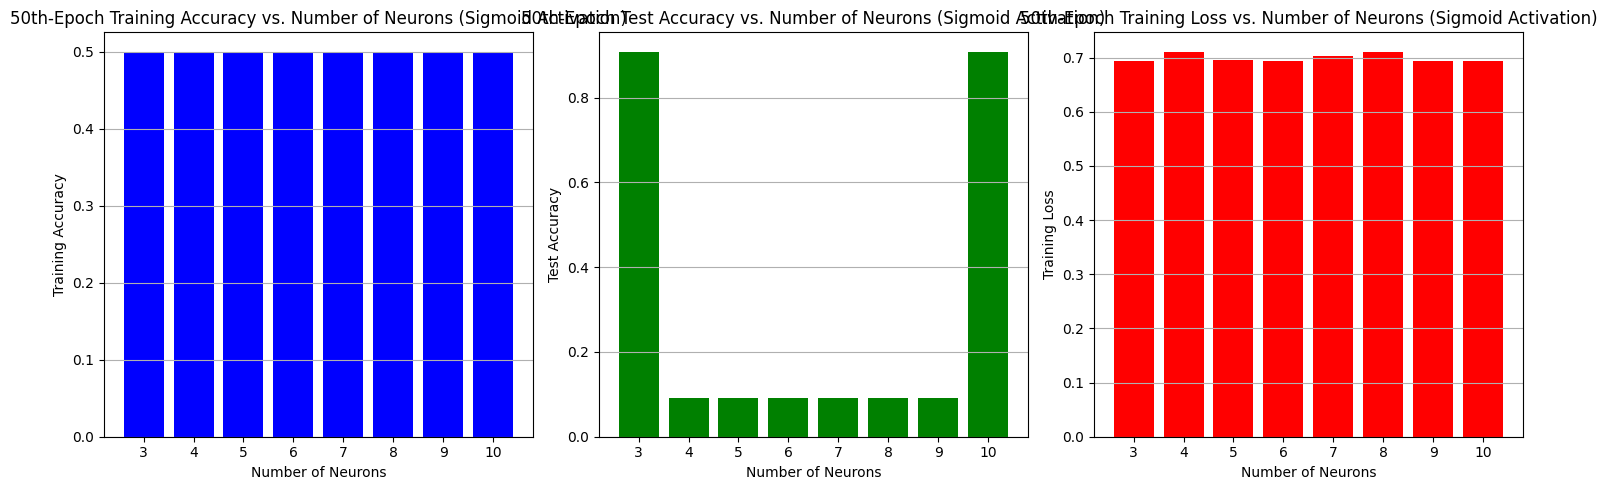

In [ ]:
# Plotting the 50th-epoch results for varying number of neurons in 5-layer model with sigmoid activation
plt.figure(figsize=(15, 5))

# Plot for 50th-epoch Training Accuracy
plt.subplot(1, 3, 1)
plt.bar(results_sigmoid_df['Number_of_Neurons'], results_sigmoid_df['Training_Accuracy_50th_Epoch'], color='blue')
plt.xlabel('Number of Neurons')
plt.ylabel('Training Accuracy')
plt.title('50th-Epoch Training Accuracy vs. Number of Neurons (Sigmoid Activation)')
plt.grid(True, axis='y')

# Plot for 50th-epoch Test Accuracy
plt.subplot(1, 3, 2)
plt.bar(results_sigmoid_df['Number_of_Neurons'], results_sigmoid_df['Test_Accuracy_50th_Epoch'], color='green')
plt.xlabel('Number of Neurons')
plt.ylabel('Test Accuracy')
plt.title('50th-Epoch Test Accuracy vs. Number of Neurons (Sigmoid Activation)')
plt.grid(True, axis='y')

# Plot for 50th-epoch Training Loss
plt.subplot(1, 3, 3)
plt.bar(results_sigmoid_df['Number_of_Neurons'], results_sigmoid_df['Training_Loss_50th_Epoch'], color='red')
plt.xlabel('Number of Neurons')
plt.ylabel('Training Loss')
plt.title('50th-Epoch Training Loss vs. Number of Neurons (Sigmoid Activation)')
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()


# Explaining the model

In [ ]:
!pip install shap

In [ ]:
import shap
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load your data here. Replace these lines with your actual data loading code.
train_df = pd.read_csv("resampled_data_allactions_train.csv")
test_df = pd.read_csv("resampled_data_allactions_test.csv")
X_train = train_df.drop(columns=['target'])
y_train = train_df['target']
X_test = test_df.drop(columns=['target'])
y_test = test_df['target']


# Initialize and train MLPClassifier
mlp_5x5 = MLPClassifier(hidden_layer_sizes=(5, 5, 5, 5, 5), max_iter=50, random_state=42)
mlp_5x5.fit(X_train, y_train)

# Initialize the explainer
explainer = shap.KernelExplainer(mlp_5x5.predict_proba, shap.sample(X_train, 100))

# Compute SHAP values for a subset of the test set
shap_values = explainer.shap_values(X_test.iloc[:100, :])

# Create a SHAP Explanation object
expl = shap.Explanation(values=np.array(shap_values),
                        data=X_test.iloc[:100, :],
                        feature_names=list(X_test.columns))



Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.


  0%|          | 0/100 [00:00<?, ?it/s]

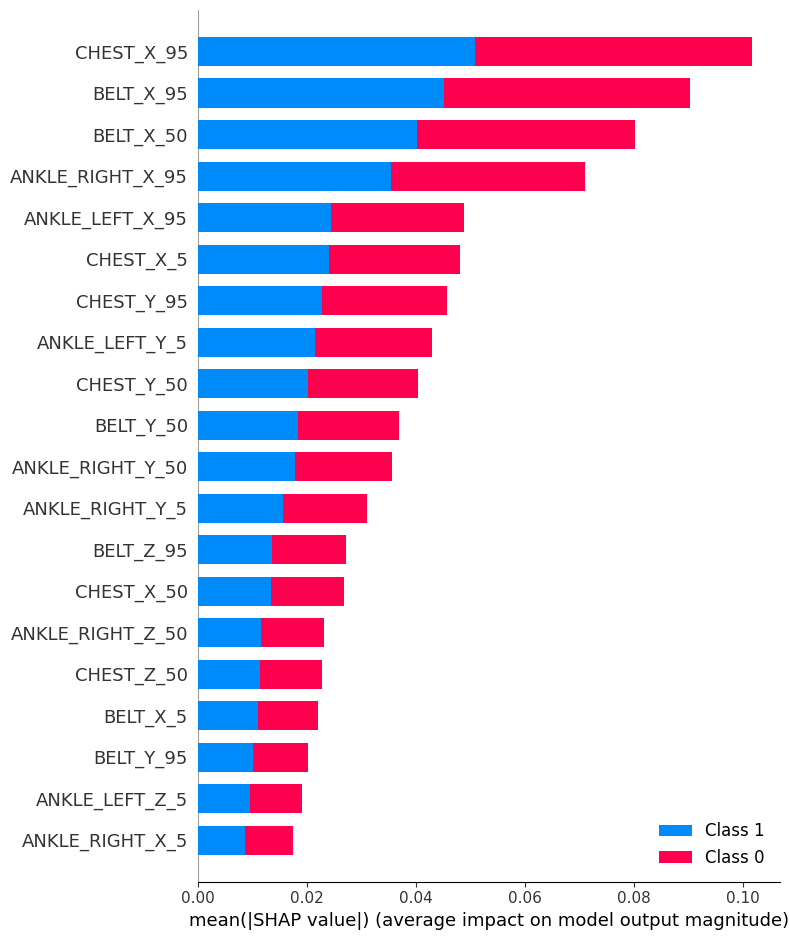

In [ ]:
shap.summary_plot(shap_values, X_test.iloc[:100, :])

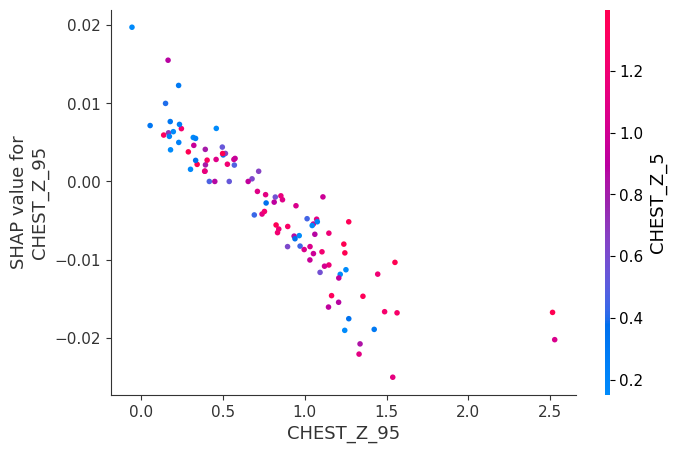

In [ ]:
# Create dependence plot
shap.dependence_plot("CHEST_Z_95", expl.values[1], X_test.iloc[:100, :], interaction_index="CHEST_Z_5")


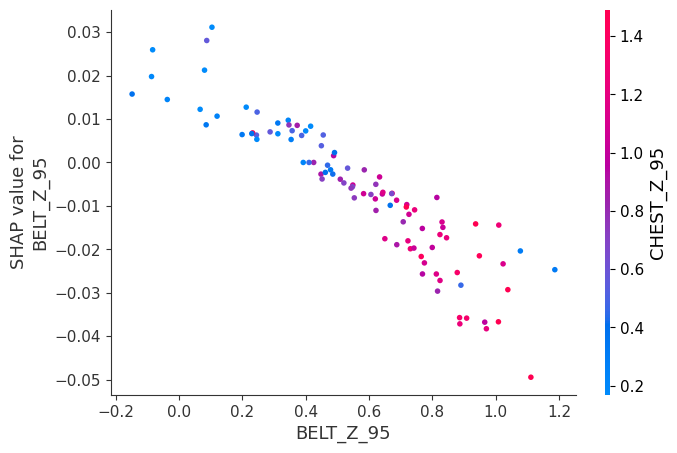

In [ ]:
# Create dependence plot
shap.dependence_plot("BELT_Z_95", expl.values[1], X_test.iloc[:100, :], interaction_index="CHEST_Z_95")


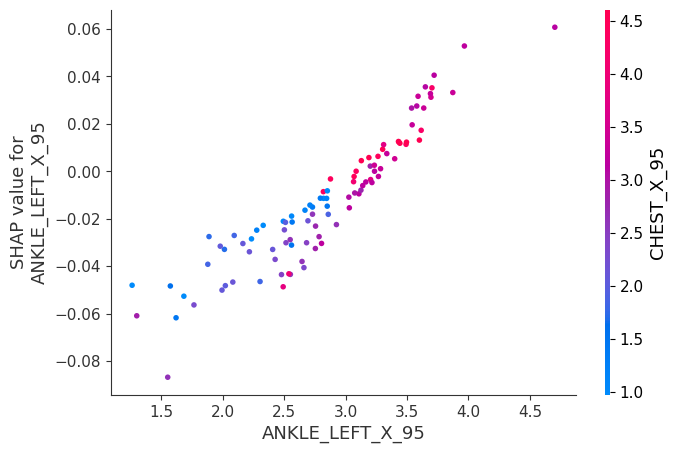

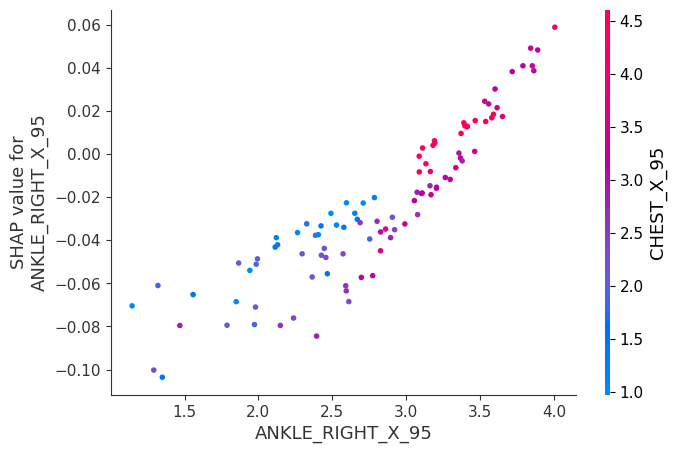

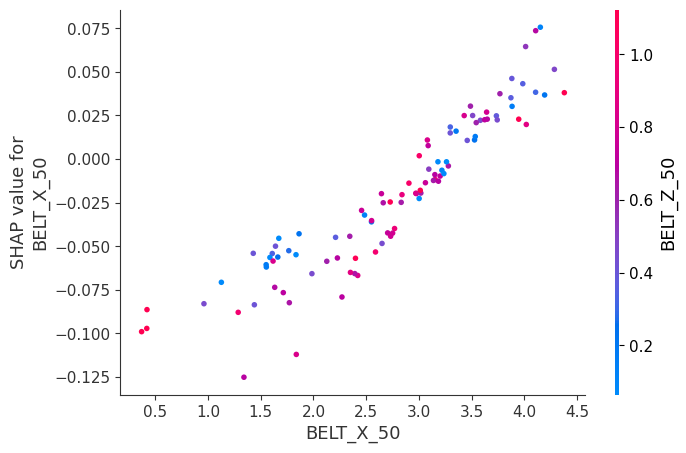

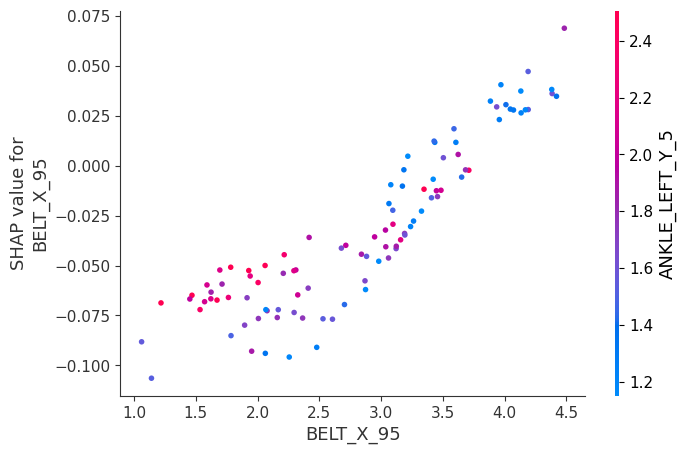

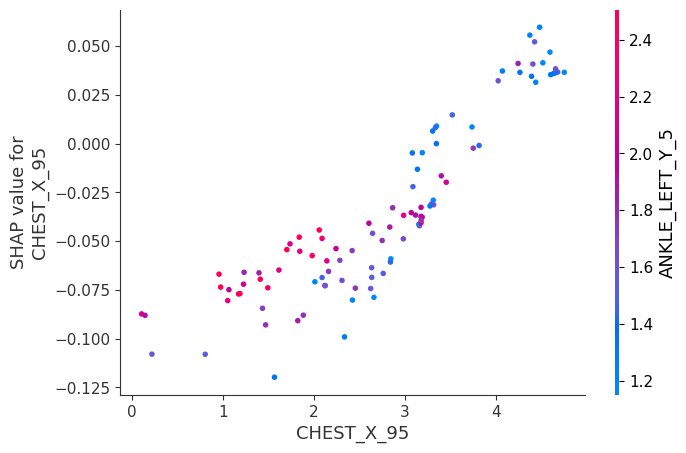

In [ ]:
# Sum the SHAP values for each class to get the importance of each feature
feature_importance = np.abs(shap_values[0]).mean(axis=0) + np.abs(shap_values[1]).mean(axis=0)

# Get the names of the most important features
most_important_features = np.argsort(feature_importance)[-5:]

# Draw dependence plots for the most important features
for feature_index in most_important_features:
    shap.dependence_plot(feature_index, shap_values[1], X_test.iloc[:100, :], feature_names=X_test.columns)
